# Исследование рынка компьютерных игр

## Содержание

- Введение
- Описание данных
- Шаг 1. Откроем файлы с данными и изучим общую информацию
- Шаг 2. Подготовим данные
- Шаг 3. Проведём исследовательский анализ данных
-    3.1 Предсказание популярности платформ
-    3.2 Построение ящика с усами
-    3.3 Оценка влияния оценки пользователей и критиков на продажи
-    3.4 Исследование платформ PS4,XOne и PC
-    3.5 Общее распределение игр по жанрам
- Шаг 4. Составим портрет пользователя каждого региона
- Шаг 5. Проверим гипотезы
-    5.1 Проверка гипотезы №1
-    5.2 Проверка гипотезы №2
- Шаг 6. Общий вывод

# Шаг 1. Откроем файлы с данными и изучим общую информацию

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import datetime
from tqdm import tqdm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = 100

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
print('Количество дубликатов: {}'.format(games.duplicated().sum()))

Количество дубликатов: 0


In [5]:
display(pd.DataFrame(round(games.isna().mean()*100,1)).style.background_gradient('coolwarm'))

,0
Name,0.000000
Platform,0.000000
Year_of_Release,1.600000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.300000
User_Score,40.100000


In [6]:
games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14280,EverBlue 2,PS2,"2,002.00",Adventure,0.02,0.01,0.00,0.00,59.00,7.5,E
5160,Zero4 Champ RR,SNES,"1,994.00",Sports,0.00,0.00,0.36,0.00,NaN,NaN,NaN
1956,Seek and Destroy,PS2,"2,002.00",Racing,0.52,0.40,0.00,0.14,63.00,8.8,T
16201,The Technomancer,PC,"2,016.00",Role-Playing,0.00,0.01,0.00,0.00,56.00,6.8,M
16297,BattleForge,PC,"2,009.00",Strategy,0.00,0.01,0.00,0.00,75.00,7,T
7753,Dynasty Warriors: Gundam 2,X360,"2,008.00",Action,0.07,0.03,0.08,0.01,49.00,7,T
15975,Paranormal Pursuit: The Gifted One,PC,"2,015.00",Action,0.00,0.01,0.00,0.00,NaN,tbd,NaN
15339,Sugoi Hebereke,SNES,"1,994.00",Fighting,0.00,0.00,0.02,0.00,NaN,NaN,NaN
10712,Rocky: Legends,XB,"2,004.00",Action,0.07,0.02,0.00,0.00,67.00,5.2,T
495,Super Mario World 2: Yoshi's Island,GBA,"2,002.00",Platform,1.75,0.45,0.62,0.09,NaN,NaN,NaN


In [7]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


 <div class="alert alert-info">
<h2> Выводы </h2>

 В нашей базе данных 16715 строк и 10 столбцов. В столбцах: Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating присутствуют пропуски. В столбцах Year_of_Release и User_Score не соответствует тип данных.


<font color='blue'> Этот код позволяет менять цвет текста. </font>

# Шаг 2. Подготовим данные

Заменим названия столбцов (приведём к нижнему регистру):

In [8]:
games.columns = games.columns.str.lower()

Удаляем пропуски:

In [9]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
games = games.dropna(subset=['name']).reset_index(drop=True)

Преобразуем данные в нужные типы и заменяем пропущенные значения:

In [11]:
games = games.dropna(subset=['year_of_release']).reset_index(drop=True)
games['year_of_release'] = games['year_of_release'].astype('int64')

In [12]:
games['user_score']=pd.to_numeric(games['user_score'], errors='coerce')

In [13]:
games['rating'] = games['rating'].fillna('unknown')

 <div class="alert alert-info">
<h2> Выводы </h2>

- На данном этапе были проведены замены названий столбцов на более удобные для дальнейшей работы, а также проведена работа по поиску и замене пропущенных значений.

- Нам встретились пропущенные значения в столбцах name, year_of_release, critic_score, user_score и rating.
    
- В столбце name их всего 2, мы их просто удалили.
    
- Пропуски значений рейтинга игр были заменены на строку 'unknown', т.к. это номинативная переменная и не представляется возможным произвести оценку ее действительных значений для той или иной игры.
    
- В столбце  user_score заменили значения на числовые. строка 'tbd', означающая 'еще не определена' (от английского to be defined) заменим на NAN.
    
    
- Пропуски пока остались в столбцах  critic_score и user_score, замена их на что-то будет неккоректна.


<font color='blue'> Этот код позволяет менять цвет текста. </font>

# Шаг 3. Проведём исследовательский анализ данных

In [14]:
games['all_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

Посмотрим, сколько игр выпускалось в разные годы:

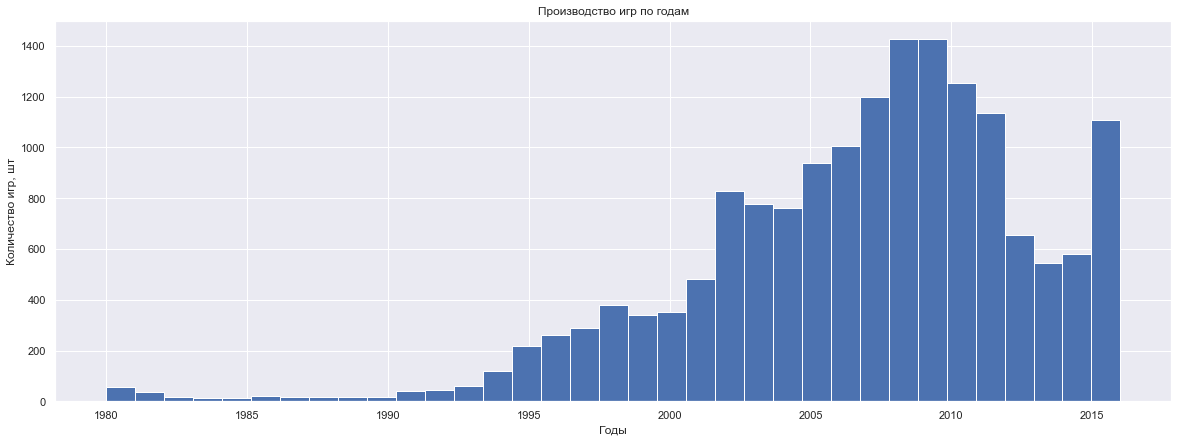

In [15]:
games['year_of_release'].hist(bins = 35, figsize = (20, 7))
plt.title('Производство игр по годам')
plt.xlabel('Годы')
plt.ylabel('Количество игр, шт')
plt.show()

 <div class="alert alert-info">
<h2> Выводы </h2>

Хотя  электронные игры начали выпускать с 1980 года, только к 1995 году их количество, выходящих в год, достигло 219 единиц, а к 2002 - 829. Пика ежегодных релизов был достигнут в 2008 и в 2009 году. В дальнейшим количество ежегодных релизов снизилось более,чем в 2 раза. Для анализа нам более интересен период с 2003 по 2016 годы.   


<font color='blue'>  </font>

Суммарные продажи по платформам за весь наблюдаемый период:

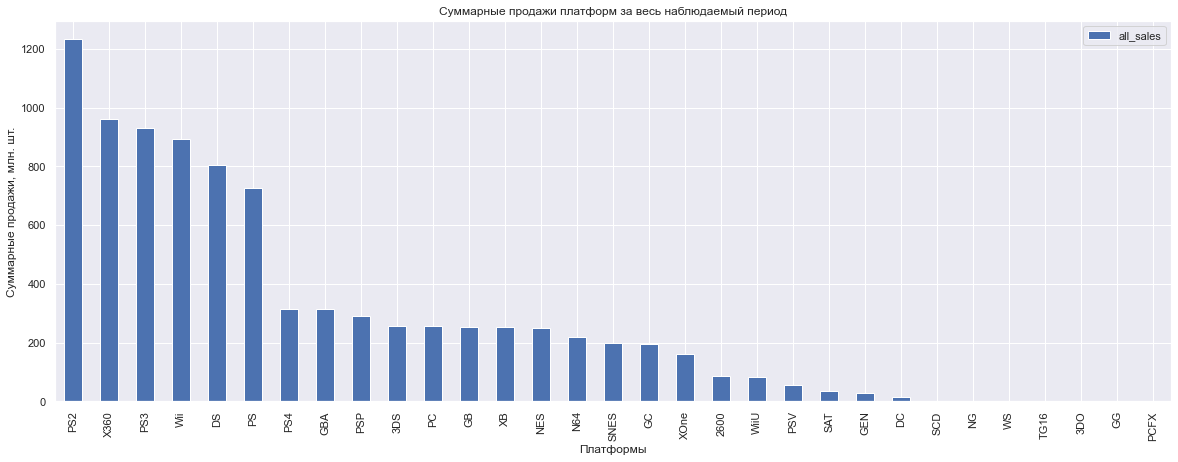

In [16]:
games.groupby('platform')['all_sales'].sum().sort_values(ascending = False).reset_index().\
                                        plot.bar(x='platform', y='all_sales', figsize = (20, 7))
plt.title('Суммарные продажи платформ за весь наблюдаемый период')
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи, млн. шт.')
plt.show()

Платформы с наибольшими суммарными продажами (Тор - 10):

In [17]:
top_10_platform_sales = games.groupby('platform')['all_sales'].sum().sort_values(ascending = False).reset_index().head(10)
display(top_10_platform_sales)
top_10_platform_list = top_10_platform_sales['platform'].tolist()

,platform,all_sales
0,PS2,"1,233.56"
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Top - 10 платформ с наибольшими суммарными продажами распределенных по годам:

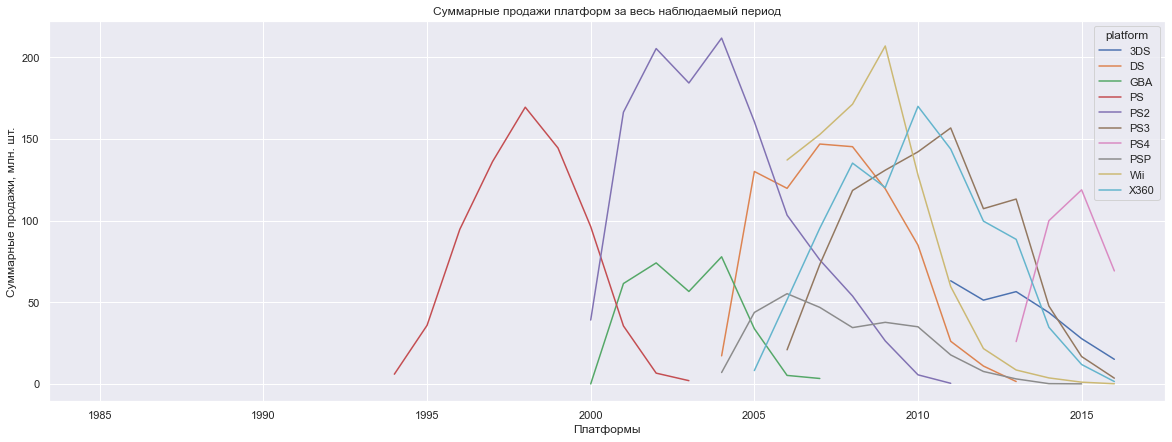

In [18]:
games.query('platform == @top_10_platform_list'). \
                                    pivot_table(index = 'year_of_release', values = 'all_sales', \
                                      columns = 'platform', aggfunc = 'sum').plot(figsize = (20, 7))
plt.title('Суммарные продажи платформ за весь наблюдаемый период')
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи, млн. шт.')
plt.show()

Построим график распределения жизненного цикла платформ. Рассмотрим основные статистики получившегося показателя:

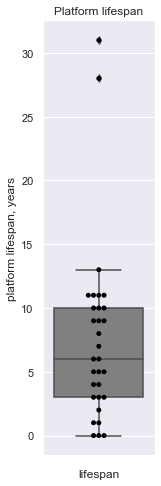

In [19]:
# вычисляем продолжительность жизни платформы
life_span = games.groupby('platform').year_of_release.max() - games.groupby('platform').year_of_release.min()

fig, (ax1) = plt.subplots(
    nrows=1, ncols=1,
    figsize=(2, 8)
)
sns.boxplot(y=life_span, color='grey', ax=ax1)
sns.swarmplot(y=life_span, color='black')
ax1.set_title('Platform lifespan')
ax1.set_xlabel('lifespan')
ax1.set_ylabel('platform lifespan, years');

In [20]:
life_span.describe()

count   31.00
mean     7.61
std      7.00
min      0.00
25%      3.00
50%      6.00
75%     10.00
max     31.00
Name: year_of_release, dtype: float64

 <div class="alert alert-info">
<h2> Выводы </h2>

Если учитывать все платформы, то мы видим, что среднее равно 6, а мендиана 7,5

<font color='blue'> Этот код позволяет менять цвет текста. </font>

Определение распределения данных:

<AxesSubplot:xlabel='year_of_release'>

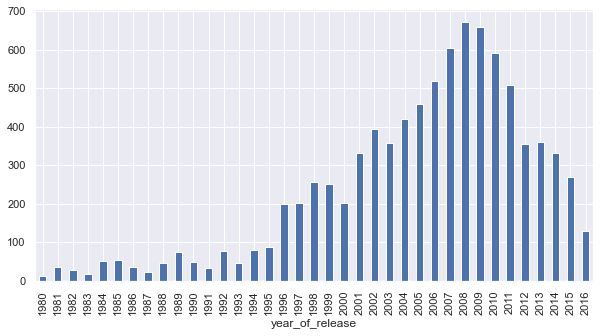

In [21]:
games.groupby('year_of_release')['all_sales'].sum().plot(grid=True, kind='bar',figsize=(10, 5))

 <div class="alert alert-info">
<h2> Выводы </h2>

Количество продаж резко падает в 2016, это связано с тем, что данные за 2016 не заполнены до конца. Нормальным выглядит распределение продаж с 2003 по 2014, нужно избавиться от выбросов, чтобы убедиться в этом. А также выберем платформы с ненулевыми продажами за 2016 год, чтобы работать с ними в дальнейшем.

<font color='blue'> Этот код позволяет менять цвет текста. </font>

Избавимся от выбросов:

<AxesSubplot:>

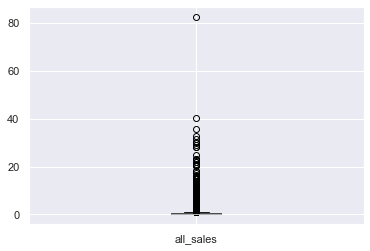

In [22]:
games.boxplot(column=['all_sales'])

Количество суммарных продаж более 80 является выбросом.

In [23]:
games_2016=games[(games.year_of_release==2016)&(games.all_sales>0)]
games_2016['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

 <div class="alert alert-info">
<h2> Выводы </h2>

В 2016 существуют платформы: PS4, 3DS, XOne, WiiU, PS3, PC, X360, PSV, Wii.

<font color='blue'> Этот код позволяет менять цвет текста. </font>

<AxesSubplot:xlabel='year_of_release'>

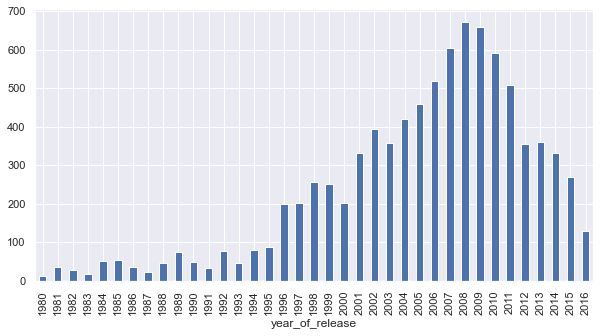

In [24]:
games.groupby('year_of_release')['all_sales'].sum().plot(grid=True, kind='bar',figsize=(10, 5))

In [28]:
# отбрасываем выбросы
games=games[(games.all_sales < 80)]
# по гистограмме выбираем столбцы с нормальным распределением
actual_games=games[games.year_of_release >= 2013]

In [29]:
actual_games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,"2,233.00","2,233.00","2,233.00","2,233.00","2,233.00",991.00,"1,192.00","2,233.00"
mean,"2,014.48",0.20,0.18,0.06,0.05,72.02,6.58,0.49
std,1.09,0.55,0.51,0.23,0.17,12.84,1.61,1.24
min,"2,013.00",0.00,0.00,0.00,0.00,13.00,0.20,0.01
25%,"2,014.00",0.00,0.00,0.00,0.00,66.00,5.80,0.03
50%,"2,014.00",0.02,0.03,0.01,0.01,74.00,7.00,0.11
75%,"2,015.00",0.15,0.13,0.05,0.04,81.00,7.80,0.40
max,"2,016.00",9.66,9.09,4.35,3.96,97.00,9.30,21.05


 <div class="alert alert-info">
<h2> Выводы </h2>

Нормально распределены данные за период с 2003 по 2016 год, его используем в дальнейшей работе. Но учитывая средний срок жизни платформ около 6-7 лет. И необходимость прогноза на 2007 год. То актуальный период считаем с 2013 года.
<font color='blue'> Этот код позволяет менять цвет текста. </font>

## Предсказание популярности платформ

In [30]:
plt_sales = actual_games.groupby('platform', as_index=False).agg({'all_sales': 'sum'}) \
    .sort_values('all_sales', ascending=False)

<Figure size 864x576 with 0 Axes>

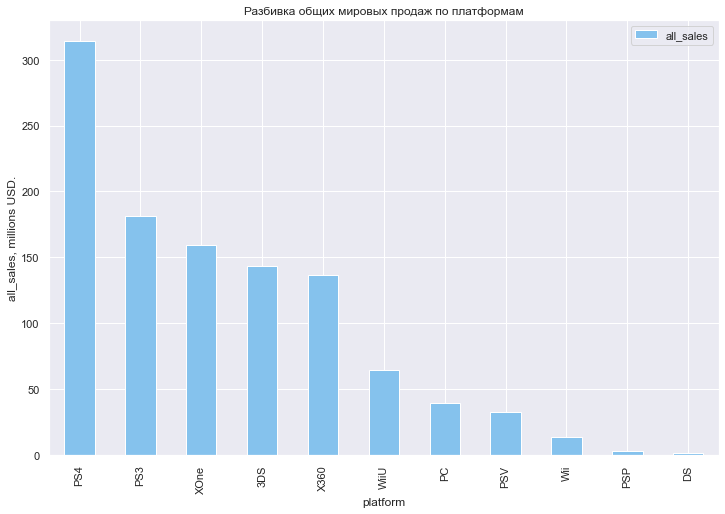

In [31]:
# размер фигуры
plt.figure(figsize=(12, 8))

# задание параметров построения графика
plt_sales.plot(x='platform',
               y='all_sales',
               kind='bar',
               figsize=(12, 8),
               title='Разбивка общих мировых продаж по платформам',
               color='#85c2ed');

# задание подписи оси у
plt.ylabel('all_sales, millions USD.');

In [49]:
# группировка данных платформ за последние 3 года по годам и платформам и подсчет суммарных мировых продаж
plt_sales_3year = actual_games.query('year_of_release >= 2013') \
    .groupby(['year_of_release', 'platform'], as_index=False) \
    .agg({'all_sales': 'sum'}) \
    .sort_values('year_of_release', ascending=True)

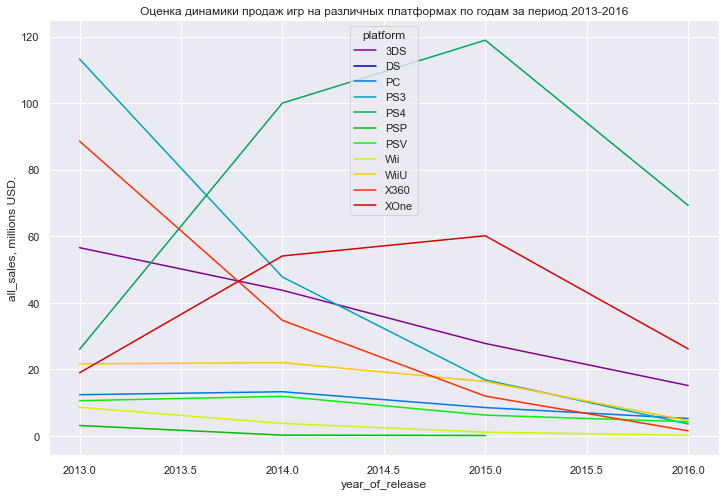

In [50]:
# размер фигуры
plt.figure(figsize=(12, 8))

# параметры графика
sns.lineplot(x=plt_sales_3year.year_of_release,
             y=plt_sales_3year.all_sales,
             hue=plt_sales_3year.platform,
             legend='full',
             palette='nipy_spectral');

# задание подписи оси у
plt.ylabel('all_sales, millions USD.');
plt.title('Оценка динамики продаж игр на различных платформах по годам за период 2013-2016');

 <div class="alert alert-info">
<h2> Выводы </h2>

Учитывая что у нас данные за 2016 год не полные, то сделав на это поправку, с помощью графика выше мы можем сказать что на данный момент по прежнему растущими и перспективными являются только две платформы: PS4 и XOne. 
    
    
Остатки популярности имеются у 3DS.
    
    
Также не забудем про PC,его рынок большей частью нелегальный,но какая-то часть всё-таки попадает в статистику. 
    
    
Продажи игр на остальных платфорах незначительны или стремятся к нулю. 
    
    
Поэтому на данном этапе исследования дальше будем работать именно с этими тремя платформами: PS4, XOne, 3DS и PC.
<font color='blue'> Этот код позволяет менять цвет текста. </font>

## Построение ящика с усами

<AxesSubplot:xlabel='platform', ylabel='all_sales'>

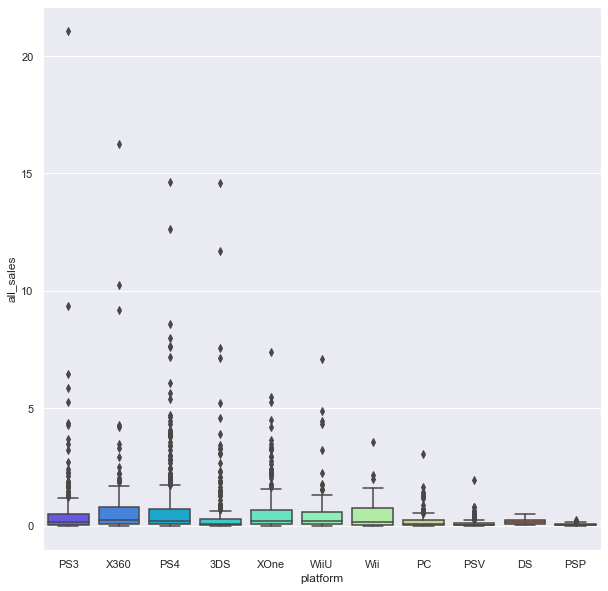

In [51]:
plt.figure(figsize=(10,10))
sns.boxplot (x = 'platform', y = 'all_sales', data = actual_games, palette='rainbow')

 <div class="alert alert-info">
<h2> Выводы </h2>

Продажи XOne и PS4 сильно выделяются на фоне остальных, что неудивительно, потому что это лидеры рынка.
<font color='blue'> Этот код позволяет менять цвет текста. </font>

## Оценка влияния оценки пользователей и критиков на продажи

In [52]:
corr = actual_games[['critic_score', 'user_score', 'na_sales', 'eu_sales', 'jp_sales']].corr()
corr.style.background_gradient(cmap='coolwarm')

,critic_score,user_score,na_sales,eu_sales,jp_sales
critic_score,1.000000,0.502221,0.301130,0.280785,0.134143
user_score,0.502221,1.000000,-0.020010,-0.027040,0.194025
na_sales,0.301130,-0.020010,1.000000,0.769995,0.264513
eu_sales,0.280785,-0.027040,0.769995,1.000000,0.244616
jp_sales,0.134143,0.194025,0.264513,0.244616,1.000000


 <div class="alert alert-info">
<h2> Выводы </h2>

В целом оценки критиков слабо коррелируются с продажами, а оценки пользователй и продажи имеют очень слабую корреляцию (практически нулевую).
<font color='blue'> Этот код позволяет менять цвет текста. </font>

## Исследование платформ PS4,XOne и PC

In [53]:
# список названий трех наиболее актуальных платформ
popular_platforms = ['PS4', 'XOne', 'PC']

# делаем выборку по названию платформ и году
games_platform = actual_games.query('platform in @popular_platforms & year_of_release >= 2013') \
          .reset_index(drop=True)

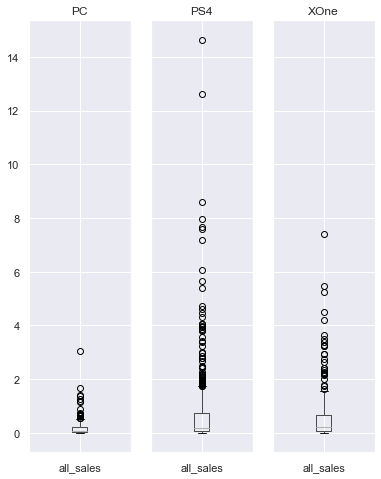

In [54]:
# построение графика типа боксплот (глобальные продажи с разбивкой по платформам)
games_platform.groupby(['platform']).boxplot(column='all_sales',
                                    figsize=(6, 8),
                                    layout=(1, 3));

In [55]:
# получение описательных статистик
games_platform.groupby(['platform']).all_sales.describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PC,189.00,0.21,0.35,0.01,0.03,0.08,0.23,3.05
PS4,392.00,0.80,1.61,0.01,0.06,0.20,0.73,14.63
XOne,247.00,0.65,1.04,0.01,0.06,0.22,0.69,7.39


 <div class="alert alert-info">
<h2> Выводы </h2>

По полученном графику можем наблюдать, что средние значения для PS4 и XOne примерно одинаковые. Так же мы можем сказать по наличию большого количества выбросов на графиках всех платформ, что основную выручку приносят небольшое количество игры-хитов. Их продажи в 11-20 раз превосходят средние значения общих продаж. Причем таких игр-хитов как по суммарному количеству, так и по амплитуде наблюдаемого эффекта больше на платформе PS4.
<font color='blue'> Этот код позволяет менять цвет текста. </font>

Найдем игру с максимальными мировыми продажами для каждой из платформ:

In [56]:
# отбираем индексы
games_platform.groupby(['platform']).all_sales.idxmax()

platform
PC      38
PS4      0
XOne     6
Name: all_sales, dtype: int64

In [57]:
# выводим наиболее продаваемые игры по отобранным индексам
games_platform.iloc[[36, 0, 6]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
36,Madden NFL 16,PS4,2015,Sports,2.34,0.30,0.00,0.60,83.00,5.90,E,3.24
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
6,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown,7.39


Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграммы рассеивания и посчитаем коэффициенты корреляции между отзывами и продажами:

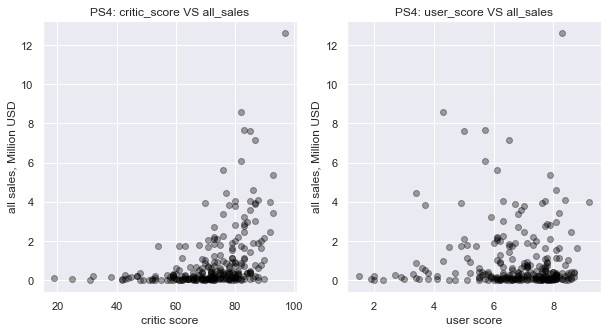

In [58]:
# делаем срез данных по названию платформы
games_ps4 = games_platform.query('platform == "PS4"')

# размечаем пространство для вывода графиков
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(10, 5)
)

# построение и оформление графика рассеивания для отзывов критиков
ax1.scatter(x=games_ps4.critic_score,
            y=games_ps4.all_sales,
            alpha=0.35,
            color='black');
ax1.set_title('PS4: critic_score VS all_sales')
ax1.set_xlabel('critic score')
ax1.set_ylabel('all sales, Million USD')

# построение и оформление графика рассеивания для отзывов пользователей
ax2.scatter(x=games_ps4.user_score,
            y=games_ps4.all_sales,
            alpha=0.35,
            color='black');
ax2.set_title('PS4: user_score VS all_sales')
ax2.set_xlabel('user score')
ax2.set_ylabel('all sales, Million USD');

In [59]:
# Подсчет и вывод на экран коэффициентов корреляции
print('PS4:')
print('Коэффициент корреляции глобальных продаж и оценки критиков:', round(games_ps4['all_sales'].corr(games_ps4['critic_score']), 3))
print('Коэффициент корреляции глобальных продаж и оценки пользователей:', round(games_ps4['all_sales'].corr(games_ps4['user_score']), 3))

PS4:
Коэффициент корреляции глобальных продаж и оценки критиков: 0.407
Коэффициент корреляции глобальных продаж и оценки пользователей: -0.032


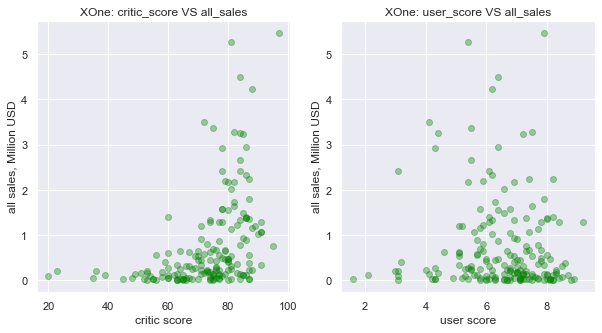

In [60]:
# делаем срез данных по названию платформы
games_xone = games_platform.query('platform == "XOne"')

# размечаем пространство для вывода графиков
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(10, 5)
)

# построение и оформление графика рассеивания для отзывов критиков
ax1.scatter(x=games_xone.critic_score,
            y=games_xone.all_sales,
            alpha=0.35,
            color='green');
ax1.set_title('XOne: critic_score VS all_sales')
ax1.set_xlabel('critic score')
ax1.set_ylabel('all sales, Million USD')

# построение и оформление графика рассеивания для отзывов пользователей
ax2.scatter(x=games_xone.user_score,
            y=games_xone.all_sales,
            alpha=0.35,
            color='green');
ax2.set_title('XOne: user_score VS all_sales')
ax2.set_xlabel('user score')
ax2.set_ylabel('all sales, Million USD');

In [61]:
# Подсчет и вывод на экран коэффициентов корреляции
print('XOne:')
print('Коэффициент корреляции глобальных продаж и оценки критиков:', round(games_xone['all_sales'].corr(games_xone['critic_score']), 3))
print('Коэффициент корреляции глобальных продаж и оценки пользователей:', round(games_xone['all_sales'].corr(games_xone['user_score']), 3))

XOne:
Коэффициент корреляции глобальных продаж и оценки критиков: 0.417
Коэффициент корреляции глобальных продаж и оценки пользователей: -0.069


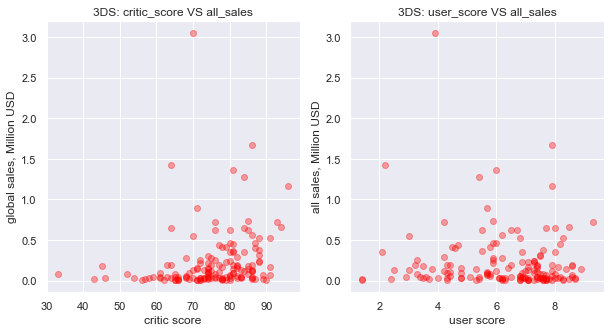

In [62]:
# делаем срез данных по названию платформы
games_pc = games_platform.query('platform == "PC"')

# размечаем пространство для вывода графиков
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(10, 5)
)

# построение и оформление графика рассеивания для отзывов критиков
ax1.scatter(x=games_pc.critic_score,
            y=games_pc.all_sales,
            alpha=0.35,
            color='red');
ax1.set_title('3DS: critic_score VS all_sales')
ax1.set_xlabel('critic score')
ax1.set_ylabel('global sales, Million USD')

# построение и оформление графика рассеивания для отзывов пользователей
ax2.scatter(x=games_pc.user_score,
            y=games_pc.all_sales,
            alpha=0.35,
            color='red');
ax2.set_title('3DS: user_score VS all_sales')
ax2.set_xlabel('user score')
ax2.set_ylabel('all sales, Million USD');

In [63]:
# Подсчет и вывод на экран коэффициентов корреляции
print('PC:')
print('Коэффициент корреляции глобальных продаж и оценки критиков:', round(games_pc['all_sales'].corr(games_pc['critic_score']), 3))
print('Коэффициент корреляции глобальных продаж и оценки пользователей:', round(games_pc['all_sales'].corr(games_pc['user_score']), 3))

PC:
Коэффициент корреляции глобальных продаж и оценки критиков: 0.196
Коэффициент корреляции глобальных продаж и оценки пользователей: -0.094


 <div class="alert alert-info">
<h2> Выводы </h2>

Корреляция между продажами-оценками критиков слабая. Корреляция между продажами оценками-пользователей очень слабая, практически равная нулю для PS4, XOne и PC. Данные выводы совпадают для всех трех рассмотренных платформ. Корреляция между продажами и оценками критиков для PS4 и XOne (порядка 0.4), а для PC (порядка 0.196).    
<font color='blue'> Этот код позволяет менять цвет текста. </font>

## Посмотрим на общее распределение игр по жанрам.

In [64]:
# групировка по жанрам, сортировка и выборка данных
genres_sales_all = actual_games.groupby(['genre'], as_index=False).agg({'all_sales': 'sum'}).sort_values('all_sales', ascending=False)

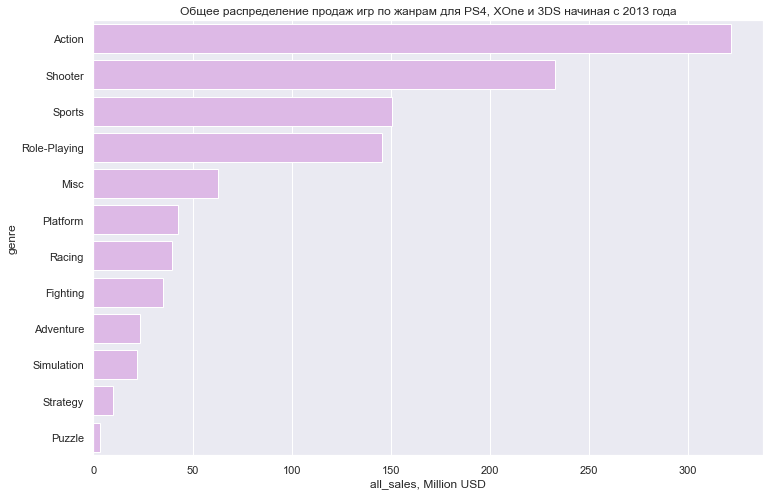

In [65]:
# размер фигуры
plt.figure(figsize=(12, 8))

# задание параметров построения графика
ax = sns.barplot(y=genres_sales_all.genre,
                 x=genres_sales_all.all_sales,
                 orient='h',
                 color='#e2b2ed',
                 ci=None);

# подписи осей и названия
plt.xlabel('all_sales, Million USD')
plt.title('Общее распределение продаж игр по жанрам для PS4, XOne и 3DS начиная с 2013 года');

Посмотрим популярность жанров с разбиением по платформам:

In [66]:
# групировка по жанрам и платформам, сортировка и выборка данных
genres_sales = actual_games.groupby(['genre', 'platform'], as_index=False).agg({'all_sales': 'sum'}).sort_values('all_sales', ascending=False)

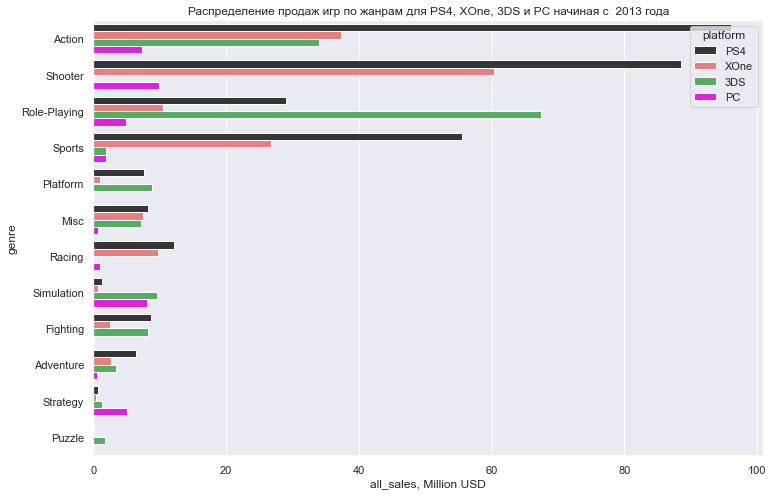

In [67]:
# размер фигуры
plt.figure(figsize=(12, 8))

# задание параметров построения графика
ax = sns.barplot(y=genres_sales.genre,
                 x=genres_sales.all_sales,
                 orient='h',
                 color='#6925c2',
                 palette=['#363636', '#f76f6f', '#49ba5a', '#ff00ff'],
                 hue=genres_sales.platform,
                 hue_order=['PS4', 'XOne','3DS','PC']
                 );

# подписи осей и названия
plt.xlabel('all_sales, Million USD')
plt.title('Распределение продаж игр по жанрам для PS4, XOne, 3DS и PC начиная c  2013 года');

In [68]:
genre_analysis_pivot_table = actual_games.groupby('genre').agg({'name':'count','all_sales':['median','sum']})
genre_analysis_pivot_table.columns = ['count', 'median','sum']
genre_analysis_pivot_table = genre_analysis_pivot_table.sort_values(by = 'sum', ascending = False)
genre_analysis_pivot_table

,count,median,sum
genre,,,
Action,766,0.11,321.87
Shooter,187,0.45,232.98
Sports,214,0.24,150.65
Role-Playing,292,0.12,145.89
Misc,155,0.10,62.82
Platform,74,0.22,42.63
Racing,85,0.12,39.89
Fighting,80,0.12,35.31
Adventure,245,0.03,23.64


 <div class="alert alert-info">
<h2> Выводы </h2>

- Наиболее популярны жанры Action, Shooter и  Sports. Продажи игр самых не популярных жанров (Puzzle и Strategy) отличаются в десятки раз по сравнению с остальными жанрами. Интересны результаты портативной платформы 3DS ( практическое отсутствие шутеров и большая популярность RPG) и PC (лидерство в жанре симуляторов и стратегий).
- Интересен феномен жанра Adventure. Игр много, но денег они приносят мало.    
<font color='blue'> Этот код позволяет менять цвет текста. </font>

# Шаг 4. Составим портрет пользователя каждого региона

Определим для пользователя каждого региона наиболее популярные платформы, наиболее популярные жанры, а также влияние рейтинга ESRB на продажи по регионам:

In [69]:
# получаем необходимый срез данных
games_region = actual_games[['platform', 'na_sales', 'eu_sales', 'jp_sales']] \
    .groupby('platform', as_index=False) \
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
    .melt(id_vars=['platform']) \
    .sort_values('value', ascending=False)

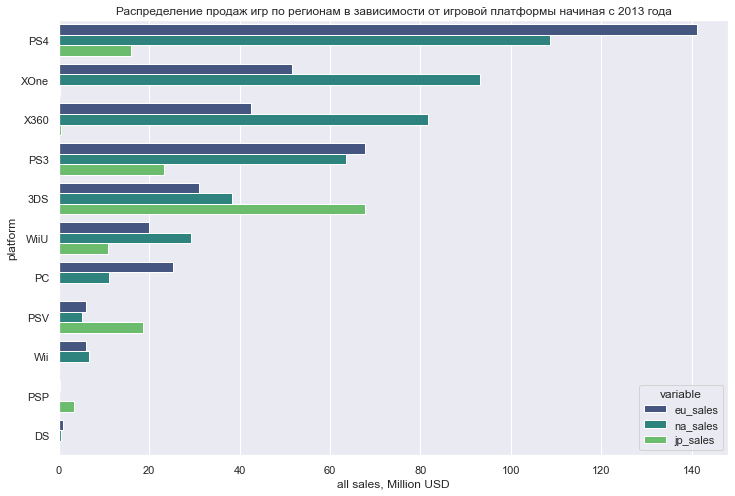

In [70]:
# размер фигуры
plt.figure(figsize=(12, 8))

# задание параметров построения графика
ax = sns.barplot(y=games_region.platform,
                 x=games_region.value,
                 orient='h',
                 color='#6925c2',
                 palette='viridis',
                 hue=games_region.variable);

# подписи осей и названия
plt.xlabel('all sales, Million USD')
plt.title('Распределение продаж игр по регионам в зависимости от игровой платформы начиная с 2013 года');

 <div class="alert alert-info">
<h2> Выводы </h2>
    
    
- Америка: PS4,XOne,X360,PS3,3DS
    
    
- Европа:  PS4,XOne,PS3,PC,3DS
    
    
- Япония:  3DS,PSV,PS4,PS3,WiiU   
    
    
- Для Америки и Европы топ 5 почти одинаков ( отличие в Америке на 3 месте X360,а в Европе -PS3,а на месте X360 находться PC)
- А вот топ 5 Японии уникален,что говорит об сильных пользовательских отличиях.
<font color='blue'> Этот код позволяет менять цвет текста. </font>

Определим самые популярные жанры игр по регионам:

In [71]:
# получаем необходимый срез данных
games_4_genre = actual_games[['genre', 'na_sales', 'eu_sales', 'jp_sales']] \
    .groupby('genre', as_index=False) \
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
    .melt(id_vars=['genre']) \
    .sort_values('value', ascending=False)

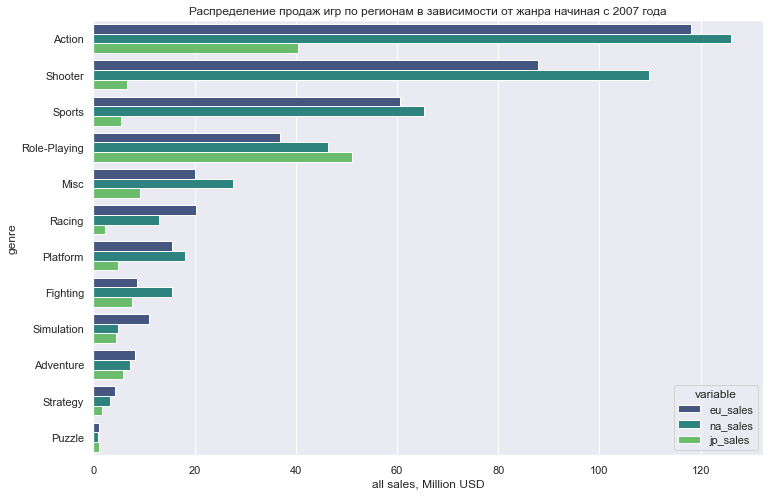

In [72]:
# размер фигуры
plt.figure(figsize=(12, 8))

# задание параметров построения графика
ax = sns.barplot(y=games_4_genre.genre,
                 x=games_4_genre.value,
                 orient='h',
                 color='#6925c2',
                 palette='viridis',
                 hue=games_4_genre.variable,
                 hue_order=['eu_sales', 'na_sales', 'jp_sales']);

# подписи осей и названия
plt.xlabel('all sales, Million USD')
plt.title('Распределение продаж игр по регионам в зависимости от жанра начиная с 2007 года');

 <div class="alert alert-info">
<h2> Выводы </h2>
    
    
- Америка и ЕВропа: АСT,SHOOTER,SPORT,RPG
    
    
- Япония:   RPG,ACT,FIGHTING,MISC   
    
    
- Для Америки и Европы топ 4 одинаков.
    
    
- Япония как и в выборе платформ,имеет сильные отличия от Европы и Америки.
<font color='blue'> Этот код позволяет менять цвет текста. </font>

Рассмотрим влияние рейтинга ESRB на продажи в отдельном регионе:

In [73]:
# получаем необходимый срез данных
games_4_rating = actual_games[['rating', 'na_sales', 'eu_sales', 'jp_sales']] \
    .groupby('rating', as_index=False) \
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
    .melt(id_vars=['rating']) \
    .sort_values('value', ascending=False)

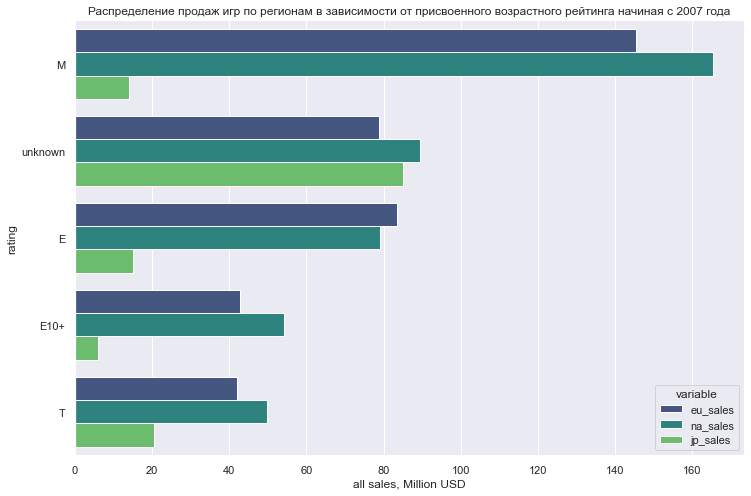

In [74]:
# размер фигуры
plt.figure(figsize=(12, 8))

# задание параметров построения графика
ax = sns.barplot(y=games_4_rating.rating,
                 x=games_4_rating.value,
                 orient='h',
                 color='#6925c2',
                 palette='viridis',
                 hue=games_4_rating.variable,
                 hue_order=['eu_sales', 'na_sales', 'jp_sales']);

# подписи осей и названия
plt.xlabel('all sales, Million USD')
plt.title('Распределение продаж игр по регионам в зависимости от присвоенного возрастного рейтинга начиная с 2007 года');

 <div class="alert alert-info">
<h2> Выводы </h2>
    
    
Игры, получившие возрастной рейтинг M (контент пригодный для лиц старше 16 лет) популярнее остальных категорий рейтинга на рынках Европы и Северной Америки. Остальные категории игр распределены относительно равномерно на этих рынках. В Японии же наибольшей популярностью, также превышающей в два раза преследователей, обладают игры возрастной рейтинг которых нам неизвестен ('unknown'). В первую очередь это может быть связано не столько с предпочтениями пользователей, а с тем, что организатор рейтинга (ESRB, Location: New York City, New York, U.S) не уделяет должного внимания играм выходящим локально на азиатском рынке
    
    
После проведенного анализа можем заключить, что портрет пользователя регионов Северная Америка и Европа не сильно различается, в то время, как азиатские потребители выделяются по проанализированным параметрам (выбор платформы, любимый жанр, ситуация с рейтингом наиболее продаваемых игр). Следовательно стоит учитывать историко-культурные различия регионов, отражающиеся непосредственно в предпочтениях пользоватлей, при ведении бизнеса.
<font color='blue'> Этот код позволяет менять цвет текста. </font>

# Шаг 5. Проверим гипотезы

## Проверка гипотезы №1.

- Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


- Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [75]:
# произведем выборку требующихся для проверки гипотезы данных
sample_1 = np.asarray(actual_games.query('platform == "XOne"').user_score.to_list())
sample_2 = np.asarray(actual_games.query('platform == "PC"').user_score.to_list())

# убираем NaN значения из наших выборок
sample_1_na = sample_1[~np.isnan(sample_1)]
sample_2_na = sample_2[~np.isnan(sample_2)]

alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

# проверка равенства дисперсий
lv = st.levene(sample_1_na, sample_2_na)
if lv.pvalue > alpha:
    param = True
    print('Обе выборки имеют схожие дисперсии')
else:
    print('Дисперсии выборок различны. Будем использовать equal_var = False')
    param = False

    
# проведение t-test    
results = st.ttest_ind(sample_1_na, sample_2_na, equal_var=param)


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Дисперсии выборок различны. Будем использовать equal_var = False
p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


 <div class="alert alert-info">
<h2> Выводы </h2>
    
Нулевую гипотезу отвергнуть не удалось. Таким образом, у нас имеются сильные основания полагать, что средние показатели рейтинга платформы Xbox One и PC одинаковые.
<font color='blue'> Этот код позволяет менять цвет текста. </font>

## Проверка гипотезы №2.

- Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые.
    
    
- Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports различаются.

In [78]:
# произведем выборку требующихся для проверки гипотезы данных
sample_1 = np.asarray(actual_games.query('genre == "Action"').user_score.to_list())
sample_2 = np.asarray(actual_games.query('genre == "Sports"').user_score.to_list())

# убираем NaN значения из наших выборок
sample_1_na = sample_1[~np.isnan(sample_1)]
sample_2_na = sample_2[~np.isnan(sample_2)]

alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу


# проверка равенства дисперсий
lv = st.levene(sample_1_na, sample_2_na)
if lv.pvalue > alpha:
    param = True
    print('Обе выборки имеют схожие дисперсии')
else:
    print('Дисперсии выборок различны. Будем использовать equal_var = False')
    param = False

    
# проведение t-test    
results = st.ttest_ind(sample_1_na, sample_2_na, equal_var=param)


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Дисперсии выборок различны. Будем использовать equal_var = False
p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


 <div class="alert alert-info">
<h2> Выводы </h2>
    
Нам удалось отвергнуть нулевую гипотезу. Таким образом, у нас имеются сильные основания полагать, что средние пользовательские рейтинги жанров Action и Sports различаются.
<font color='blue'> Этот код позволяет менять цвет текста. </font>

 <div class="alert alert-info">
<h2> Шаг 6. Общий вывод </h2>


- В ходе проделанной работы было выполнено:

- Просмотрена таблица, выявлены аномалии и пропущенные значения.
- Проведена предобработка таблицы: замена столбцов, заполнение пропусков, удаление дубликатов и т.д.
- Проведен анализ по данным и подготовлены актуальные данные.
- Составлены портреты пользователей для купных регионов продаж.
- Выполнены проверки гипотез.
- Продажи компьютерных игр зависят от трех основных составляющих: кто игру создал, на какой платформе она сделана и какого она жанра.

    
    
- Сейчас популярны компании, которые уже давно разрабатывают игры. Они используют свои любимые жанры и уже накопили аудиторию фанатов, которая обязательно купит их игру.
- Платформа определяет технические возможности разработчиков. Здесь есть прямая зависимость: лучше платформа значит можно сделать игру лучше. Жизненный цикл в 5-12 лет обусловлен скачками в технологиях процессора, оперативной и видеопамяти.
- Жанр - это то, что выбирает игрок. Каждый человек уникален, и не каждому игроку будет по душе одновременно стратегия и шутеры. Соответсвенно студии-разработчики и издатели боряться за целевую аудиторию своего продукта.

    
    
- Сводный анализ для кампании на 2017 год.

- Делать ставку на современные платформы. Покупать вышедшие и новые игры на PS4, XOne и 3DS .
- Выставлять на прилавки популярные жанры - экшен, шутеры, спортивные и ролевые игры.
- Следить за своей аудиторией. В основом большинство игр рассчитано на игроков, которым 17 лет и старше.
- Учитывать специфику азиатского рынка при запуска рекламных компаний;    
- Не забывать распространять компьютерные игры и портации игр с популярных платформ на PC. Компьютер еще долго не выйдет из конкуренции за игроков.




<font color='blue'> Этот код позволяет менять цвет текста. </font>